In [1]:
import matplotlib.pyplot as plt
import qutip as qp
import numpy as np
from H_generator import H_generator
from QuIPI_circuit import QuIPI_circuit

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Inilization

In [3]:
H_gen = H_generator() # Hamiltonian generator

In [4]:
QC = QuIPI_circuit() # quantum circuit
s = 10 # squeezing factor
cut = 20
max_cut = 100
QC.set_qumode_para(s, cut, max_cut)
N = 3 # number of qubits

# Process

In [5]:
E_est_list = [] # store the approximate ground energy
E_g_exact_list = [] # store the exact ground state energy
E_e_exact_list = [] # store the exact first excited state energy

# Initial state, b1 (b2) corresponds to before (after) 
b1 = qp.tensor([qp.snot()*qp.basis(2)]*N) # H|0>
b2 = qp.tensor([qp.basis(2)]*N) # All spin up

K = 3
J = 1
h_list = np.arange(0.5, 1.5, 0.05)
for h in h_list:
    if h < 1:
        b = b1
        shift_E = 3.8
    else:
        b = b2
        shift_E = 4.5
    H = H_gen.build_Kitaev_ring(N, h, J, shift_E)
    E_exact = H.eigenenergies()
    E_g_exact_list.append(E_exact[0] - shift_E)
    E_e_exact_list.append(E_exact[1] - shift_E)
    E_list, state_list = QC.evolution(H, b, K)
    E_est_list.append(E_list[-1] - shift_E)

# Result

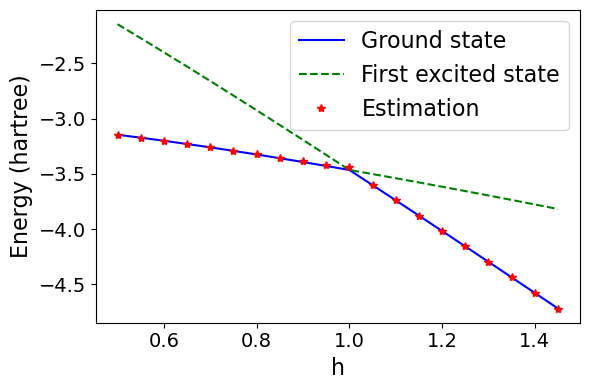

In [6]:
fig = plt.figure(figsize=[6,4])
plt.plot(h_list, E_g_exact_list, 'b', label = 'Ground state')
plt.plot(h_list, E_e_exact_list, '--g', label = 'First excited state')
plt.plot(h_list, E_est_list, '*r', label = 'Estimation')
plt.xlabel('h', fontsize = 16)
plt.ylabel('Energy (hartree)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.show()